# 資料科學套件


# Pandas 簡介

提供靈活直觀的資料結構來處理關聯數據和有標籤的數據

---
# Pandas 提供的資料結構

| 名稱 | 描述 |
|:--:|:------:|
| Series | 可以建立索引的一維陣列       |
| DataFrame | 有列索引與欄標籤的二維資料集 |
| Panel | 有資料集索引、列索引與欄標籤的三維資料集 |

---
# 使用 Pandas

首先我們用 `import` 引入 pandas，一般慣例上會將它重新命名成 pd: 

```python
import pandas as pd
```


In [1]:
import pandas as pd

# Series（序列）

簡單來說，是一個封裝多筆、一維資料的容器

建立一個 series：

```python
ser = pd.Series([1,2,3,4,5])
ser
```

In [2]:
ser = pd.Series([1,2,3,4,5]) #注意s大寫!
ser

#pandas以column為單位,右邊為我們輸入的值,左邊為索引值

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
ser1 = pd.Series([1,2,3,4,5], index = ["a","b","c","d","e"] )
ser1

a    1
b    2
c    3
d    4
e    5
dtype: int64

跑出結果了！發現有兩列數字（columns）

- 第一條columns顯示0～4，為index
- 第二條就是每個index所對應到的值

到此，Series 看起來和 List 很像，只不過是以縱向的形式呈現，但是我們再來看看不一樣的地方

In [6]:
ser1

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [7]:
ser1.values #->Numpy的陣列array

array([1, 2, 3, 4, 5], dtype=int64)

In [8]:
ser1.index #->他也使Numpy底下的功能

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [14]:
ser.iloc[2] #index location

3

In [15]:
ser1.loc["c"] #index location -> 英文字不用 i

3

# 建立一個 Series

將一個裝滿字串的 List 指定給 index 參數：

```python
ser1 = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
ser1
```

接下來我們就發現，Series 的每一筆資料的索引(index)都可以被指定一個獨特的標籤

# Series


其實一個 Series 是由 **標籤 (Index)** 與 **值(Values)** 組成，所以剛才的 series 若從 Excel 的角度來看，可以理解成：

![](https://drive.google.com/uc?export=download&id=1G9waSQfNJ3UMrwzYBIUcfbjc6gA_b_fi)


# 建立 Series
Series 的值都是被存在一個**numpy array**中

```python
ser1.values
# array([1, 2, 3, 4, 5], dtype=int64)
```

# Series
Series 的標籤都是被存在一個**numpy Index**物件中

```python
ser1.index
# Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
```

# 讀取序列内的資料

可以使用 iloc 方法：

```python
ser1.iloc[0]
```


# 切片序列内的資料

如同 List，Series 也支援的切片的功能：

```python
ser.iloc[索引值起點：索引值結束點]
```

與串列的切片方式一樣



請輸入：

```python
ser1.iloc[0:3]
```

In [17]:
ser1.loc["a":"c"]

a    1
b    2
c    3
dtype: int64

In [19]:
ser1.iloc[0:3]

a    1
b    2
c    3
dtype: int64

# 另一種讀取序列資料的方式

loc 方法：

```python
ser1.loc["a"]
```

# 另一種切片序列資料的方式

loc 方法：

```python
ser1.loc["a":"c"]
```

# .loc vs .iloc

- .loc 是透過標籤查找

- .iloc 是透過索引值查找

In [20]:
ser1

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [21]:
ser1.loc[["a","c","e"]]

a    1
c    3
e    5
dtype: int64

# 提取 Series 内的資料

提取多筆**不連續**的資料，可以透過指定多個標籤，並將標籤放入 List 内：
```python
ser1.loc[['a', 'c', 'e']]
```

# 提取 Series 内的資料

提取多筆不連續的資料也可以透過指定多筆數字的**索引值((

```python
ser1.iloc[[0, 2, 4]]
```

In [22]:
ser1.iloc[[0, 2, 4]]

a    1
c    3
e    5
dtype: int64

# Series 一些常用的功能

加總：

```python
ser1.sum()
```
最大：
```python
ser1.max()
```
最小：
```python
ser1.min()
```
平均：
```python
ser1.mean()
```
標準差：

```python
ser1.std()
```

# cumsum() 纍加

名稱是英文 cumulative summation 的縮寫，代表將資料由上而下的纍加：

```python
ser1.cumsum()
```

官方文件：[連結](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html)

# cumprod() 纍乘

名稱是英文 cumulative product 的縮寫，代表將資料由上而下的纍乘：

```python
ser1.cumprod()
```

# Series 更新現有的值
```python
ser1.loc['a'] = 8
ser1
```

# Series 更新多筆值
```python
ser1.loc["b":"d"] = [9, 10, 11]
ser1
```

需要注意的是，和用索引值切片不一樣的是，用 key 切片**會包含結束點自己 (也就是 key 所對應的值)**

# 刪除 Series 内的資料

```python
ser1.drop(labels='a')
```

# 刪除多筆 Series 内的資料

```python
ser1.drop(labels=['b', 'c', 'd'])
```


# 透過 dict 宣告 Series

```python
# series 每一個 index 都會對映到一個 value 
data = {
    'a': 1,
    'b': 3,
    'c': 5,
    'd': 7,
    'e': 9
}

pd.Series(data)
```

# 小結

- Series 適合處理一維的資料
- Series 的 index 可以被指定**獨特的標籤（這點與 Dictionary 十分類似）**
- Series 可以被看作是一個**有序的字典 (dict)**


# 與 Numpy 的整合

```python
import numpy as np

pd.Series(np.arange(5))
```

In [0]:
import numpy as np

# 與 Numpy 的整合

```python
even_num = np.arange(2, 11, 2)

pd.Series(even_num)
```

# 產生亂數 Series

```python
import numpy as np
rand_array = np.random.rand(10)
pd.Series(rand_array)
```
或是
```python
pd.Series(np.random.rand(5))
```

# head(), tail(), take()

```python
# 用 head 查詢前五筆資料
ser2.head()

# 用 tail 查詢後三筆資料
ser2.tail(3)

# 用 take 指定查詢索引值為 2, 4, 0 的資料
ser2.take([1, 6, 5])
```


# Series.isin

檢查輸入的資料是否在 series 裡面
```python
ser2.isin([3, 5])
```

# Series 的逐元運算

語法上與 Numpy 的逐元素運算一樣

```python
ser2 * 2
```

# Series 的逐元運算

讓每一筆資料都去和 3 做比較

```python
ser2 > 3
```

注意比較式的逐元素運算會產生一個 Boolean 的 Series

# Series 的逐元運算

若希望 Series 能夠有類似 filter() 函數的過濾功能，需要將剛才產生的 Boolean Series 套回到原本的 Series

```python
ser2[ser2 > 3]
```

可以想象成把**比較結果為 True 的資料切片出來**的概念

# 隨堂練習：

以下是每一位復仇者聯盟成員的名稱與年齡：

```python
avengers = {
    "ironman": 46,
    "captainamerica": 99,
    "blackwidow": 37,
    "thor": 430,
    "hulk": 42,
    "spiderman": 15,
    "blackpanther": 39
}

ser_age = pd.Series(avengers, index = avengers.keys())
```

請計算所有復仇者在五年前的歲數

In [31]:
avengers = {
    "ironman": 46,
    "captainamerica": 99,
    "blackwidow": 37,
    "thor": 430,
    "hulk": 42,
    "spiderman": 15,
    "blackpanther": 39
}

ser_age = pd.Series(avengers, index = avengers.keys())
ser_age-5

ironman            41
captainamerica     94
blackwidow         32
thor              425
hulk               37
spiderman          10
blackpanther       34
dtype: int64

# DataFrame（資料框架）
- 表格型資料結構 (可以想像成是一個**虛擬的 Excel 試算表**)
- 實際上是由多個 Series 組合起來的資料結構
- 適用於封裝/處理二維的資料

```python
import pandas as pd
```

# 來建立一個 DataFrame

```python
avengers = {
    "name": ["ironman","captainamerica","blackwidow","thor","hulk","spiderman", "blackpanther"],
    "age": [48, 100, 33, 430, 48, 15, 39],
    "superpower": [False, True, False, True, True, True, False]
}

df = pd.DataFrame(avengers)
print(type(df))
print(df.info)
```

In [37]:
import pandas as pd

avengers = {
    "name": ["ironman","captainamerica","blackwidow","thor","hulk","spiderman", "blackpanther"],
    "age": [48, 100, 33, 430, 48, 15, 39],
    "superpower": [False, True, False, True, True, True, False]
}

df = pd.DataFrame(avengers)
df

,name,age,superpower
0,ironman,48,False
1,captainamerica,100,True
2,blackwidow,33,False
3,thor,430,True
4,hulk,48,True
5,spiderman,15,True
6,blackpanther,39,False


In [35]:
type(df)

pandas.core.frame.DataFrame

# describe()
計算 
```python
df.describe()
```


In [36]:
df.describe() #數字資料平均

,age
count,7.000000
mean,101.857143
std,147.036762
min,15.000000
25%,36.000000
50%,48.000000
75%,74.000000
max,430.000000


# head(), tail()
```python
# 找出最前面的5筆資料
df.head()

# 找出最前面的3筆資料
df.head(3)

# 找出最後面的5筆資料
df.tail()

# 找出最後面的3筆資料
df.tail(3)
```

In [40]:
df.head(3)

,name,age,superpower
0,ironman,48,False
1,captainamerica,100,True
2,blackwidow,33,False


In [39]:
df.tail(2)

,name,age,superpower
5,spiderman,15,True
6,blackpanther,39,False


# 新增一欄資料

```python
# 可以用現有欄的資料算出
df['age_2_yr_ago'] = df['age'] - 2
```

In [42]:
df

,name,age,superpower
0,ironman,48,False
1,captainamerica,100,True
2,blackwidow,33,False
3,thor,430,True
4,hulk,48,True
5,spiderman,15,True
6,blackpanther,39,False


In [45]:
df["age"]  #Series

0     48
1    100
2     33
3    430
4     48
5     15
6     39
Name: age, dtype: int64

In [47]:
df["age_5yr_ago"] = df["age"] -5 
df

,name,age,superpower,age_5y_ago,age_5yr_ago
0,ironman,48,False,43,43
1,captainamerica,100,True,95,95
2,blackwidow,33,False,28,28
3,thor,430,True,425,425
4,hulk,48,True,43,43
5,spiderman,15,True,10,10
6,blackpanther,39,False,34,34


# 新增一欄資料

```python
# 直接用 List 指定
df['weapon'] = ["armor", "shield", "taser", "hammer", "himself", "web", "claws"]
```

In [51]:
df["weapon"] = ["armor", "shield", "taser", "hammer", "himself", "web", "claws"]
df

,name,age,superpower,age_5y_ago,age_5yr_ago,weapon
0,ironman,48,False,43,43,armor
1,captainamerica,100,True,95,95,shield
2,blackwidow,33,False,28,28,taser
3,thor,430,True,425,425,hammer
4,hulk,48,True,43,43,himself
5,spiderman,15,True,10,10,web
6,blackpanther,39,False,34,34,claws


# 若要把其中一欄的資料讀取出來

```python
df['age']
```
或是
```python
df.age
```


In [56]:
df[df["age"] < 50]

,name,age,superpower,age_5y_ago,age_5yr_ago,weapon
0,ironman,48,False,43,43,armor
2,blackwidow,33,False,28,28,taser
4,hulk,48,True,43,43,himself
5,spiderman,15,True,10,10,web
6,blackpanther,39,False,34,34,claws


In [60]:
df[df["superpower"]] #過濾出有超能力的復仇者 (加不加==True結果都一樣所以不用寫)

,name,age,superpower,age_5y_ago,age_5yr_ago,weapon
1,captainamerica,100,True,95,95,shield
3,thor,430,True,425,425,hammer
4,hulk,48,True,43,43,himself
5,spiderman,15,True,10,10,web


In [64]:
#又年輕又有超能力的
df[df["superpower"] & (df["age"] < 50)]

,name,age,superpower,age_5y_ago,age_5yr_ago,weapon
4,hulk,48,True,43,43,himself
5,spiderman,15,True,10,10,web


In [ ]:
#不具備刪除功能，所以一直建構新的資料!

# 若我想用條件選擇出一些資料
選出年齡低於 50 的復仇者

```python
# 產生出一個由布林值構成的 series
age_filter = df['age'] < 50
print(age_filter)
# 再將該 series 套回到 DataFrame
df[age_filter]
```

# 若我想用條件選擇出一些資料
可以把 code 簡化成:

```python
df[df['age'] > 50]
```

# 選擇資料

```python
df2 = df[df['age'] < 50]
df2[df2['superpower'] == True]
```

# 另一種寫法...

| 邏輯運算 | Pandas 語法 | 
|:--:|:------:|
| and | &     |
| or | |      |
| not | ~     |


所以我們可以用 & 符號結合上面兩者的搜尋結果：
```python 
(df['age'] <= 50) & (df['superpower'] == False)
```

最後就可以搜尋出符合兩個條件的結果了：
```python
df[(df['age'] <= 50) & (df['superpower'] == False)]
```

# Pandas 實戰專題：判斷股價漲跌

利用 DataFrame 判斷漲跌，將結果匯出成 Excel 報表：

1. 計算出 S&P 500 歷史資料的報酬率
2. 畫出走勢圖
3. 判斷是否為上漲
4. 最後把當天是上漲的股價資料過濾出來
5. 匯出成 Excel 檔案

---
# 範例 CSV 檔

[範例 CSV 檔](https://www.dropbox.com/s/by2hfjhm07kkhbj/s%26p500.csv?dl=1)

---
# 將工作表的資料提取出來，存入 Dataframe

```python
import pandas as pd

df = pd.read_csv(r"你的 s&p500.csv 檔案路徑")
df
```

補充：[官網教學](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)


In [71]:
import pandas as pd
#把檔案讀進來時,要利用表頭為Date的來當索引值)
df = pd.read_csv(r"s&p500.csv", index_col = "Date") 
df.loc["2018/7/2":"2018/7/31"]
#csv(.csv)  vs  excel(.xlsx)
#用任何編輯器開啟都是用逗點隔開(comma separated value)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018/7/2,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000
2018/7/3,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000
2018/7/5,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000
2018/7/6,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000
2018/7/9,2775.620117,2784.649902,2770.729980,2784.169922,2784.169922,3050040000
2018/7/10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000
2018/7/11,2779.820068,2785.909912,2770.770020,2774.020020,2774.020020,2964740000
2018/7/12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000
2018/7/13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000


# 改變 DataFrame 的 row index

```python
# 以 csv 第一欄的 Date 作爲索引
df = pd.read_csv(r"你的 s&p500.csv 檔案路徑", index_col="Date", parse_dates=True)
df
```

# 繪製走勢圖功能

讀取收盤價

```python
# 讀取 Adj Close 這一欄，回傳一個 Series
df["Adj Close"]
```

In [ ]:
#繪圖功能參考 Matplotlib

Text(0.5,1,'S&P 500 Trending')

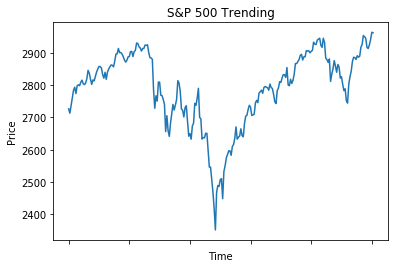

In [81]:
plt = df["Adj Close"].plot()  #讀取收盤價
plt.set_xlabel("Time")
plt.set_ylabel("Price")
plt.set_title("S&P 500 Trending")

# 畫出走勢圖

```python
# 從 Dataframe 截取收盤價，畫出走勢圖 
plt = df["Adj Close"].plot()
plt.set_xlabel("Time")
plt.set_ylabel("Price")
plt.set_title("S&P 500 Closing Prices")
```

# 計算報酬率
**pct_change()** 函數會幫你計算每一個 row 之間數值的差距，並以百分比的形式呈現出來：

```python
df["Adj Close"].pct_change(1) * 100
```

補充：[官網教學](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.pct_change.html)

In [84]:
#percent change
df["Adj Close"].pct_change(1)*100  #(1)->每一個row EX.要三筆三筆的差就(3)

Date
2018/7/2          NaN
2018/7/3    -0.494735
2018/7/5     0.862080
2018/7/6     0.848128
2018/7/9     0.882299
2018/7/10    0.347327
2018/7/11   -0.709420
2018/7/12    0.874904
2018/7/13    0.107924
2018/7/16   -0.102814
2018/7/17    0.397370
2018/7/18    0.216051
2018/7/19   -0.395299
2018/7/20   -0.094845
2018/7/23    0.183805
2018/7/24    0.478091
2018/7/25    0.910161
2018/7/26   -0.303230
2018/7/27   -0.656221
2018/7/30   -0.575417
2018/7/31    0.488473
2018/8/1    -0.104035
2018/8/2     0.492645
2018/8/3     0.464418
2018/8/6     0.353823
2018/8/7     0.282418
2018/8/8    -0.026238
2018/8/9    -0.144167
2018/8/10   -0.711389
2018/8/13   -0.400599
               ...   
2019/5/21    0.849584
2019/5/22   -0.282440
2019/5/23   -1.191415
2019/5/24    0.135356
2019/5/28   -0.837568
2019/5/29   -0.691191
2019/5/30    0.209847
2019/5/31   -1.319537
2019/6/3    -0.276524
2019/6/4     2.143237
2019/6/5     0.816185
2019/6/6     0.613559
2019/6/7     1.049770
2019/6/10    0.466004
2019/

# 將結果寫入 DataFrame

```python
df["daily return"] = df["Adj Close"].pct_change(1) * 100
```


In [86]:
df["daily return"] = df["Adj Close"].pct_change(1) * 100
df

,Open,High,Low,Close,Adj Close,Volume,daily return
Date,,,,,,,
2018/7/2,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000,NaN
2018/7/3,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000,-0.494735
2018/7/5,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000,0.862080
2018/7/6,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000,0.848128
2018/7/9,2775.620117,2784.649902,2770.729980,2784.169922,2784.169922,3050040000,0.882299
2018/7/10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000,0.347327
2018/7/11,2779.820068,2785.909912,2770.770020,2774.020020,2774.020020,2964740000,-0.709420
2018/7/12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000,0.874904
2018/7/13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000,0.107924


# 找出所有當日上漲的資料

建立表頭為 "是否上漲" 的一欄（沒錯！表頭可以用中文指定）

```python
df["是否上漲"] = df["daily return"] > 0
df
```

In [87]:
df["是否上漲"] = df["daily return"] > 0
df

,Open,High,Low,Close,Adj Close,Volume,daily return,是否上漲
Date,,,,,,,,
2018/7/2,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000,NaN,False
2018/7/3,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000,-0.494735,False
2018/7/5,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000,0.862080,True
2018/7/6,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000,0.848128,True
2018/7/9,2775.620117,2784.649902,2770.729980,2784.169922,2784.169922,3050040000,0.882299,True
2018/7/10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000,0.347327,True
2018/7/11,2779.820068,2785.909912,2770.770020,2774.020020,2774.020020,2964740000,-0.709420,False
2018/7/12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000,0.874904,True
2018/7/13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000,0.107924,True


# 過濾出所有當日上漲的資料

```python
df[df["是否上漲"] == True]
```


In [88]:
df[df["是否上漲"]]

,Open,High,Low,Close,Adj Close,Volume,daily return,是否上漲
Date,,,,,,,,
2018/7/5,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000,0.862080,True
2018/7/6,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000,0.848128,True
2018/7/9,2775.620117,2784.649902,2770.729980,2784.169922,2784.169922,3050040000,0.882299,True
2018/7/10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000,0.347327,True
2018/7/12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000,0.874904,True
2018/7/13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000,0.107924,True
2018/7/17,2789.340088,2814.189941,2789.239990,2809.550049,2809.550049,3050730000,0.397370,True
2018/7/18,2811.350098,2816.760010,2805.889893,2815.620117,2815.620117,3089780000,0.216051,True
2018/7/23,2799.169922,2808.610107,2795.139893,2806.979980,2806.979980,2907430000,0.183805,True


# 寫入 Excel

```python
result_df = df[df["是否上漲"] == True]

result_df.to_excel("stock_report.xlsx")
```

補充：[官網教學](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html)

```python
result_df.to_excel(r"指定儲存 stock_report.xlsx 的路徑", sheet_name="工作表名稱")
```

In [98]:
result_df = df[df["daily return"]>0]
result_df.to_excel("s&p500report.xlsx", sheet_name="工作")
#result_df.to_csv("stock_report.csv")
#csv沒有多個工作表
result_df

,Open,High,Low,Close,Adj Close,Volume,daily return,是否上漲
Date,,,,,,,,
2018/7/5,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000,0.862080,True
2018/7/6,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000,0.848128,True
2018/7/9,2775.620117,2784.649902,2770.729980,2784.169922,2784.169922,3050040000,0.882299,True
2018/7/10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000,0.347327,True
2018/7/12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000,0.874904,True
2018/7/13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000,0.107924,True
2018/7/17,2789.340088,2814.189941,2789.239990,2809.550049,2809.550049,3050730000,0.397370,True
2018/7/18,2811.350098,2816.760010,2805.889893,2815.620117,2815.620117,3089780000,0.216051,True
2018/7/23,2799.169922,2808.610107,2795.139893,2806.979980,2806.979980,2907430000,0.183805,True


# rolling() 滾動視窗

代表從第三個 row 開始，把每一個 row 以及前兩筆資料選起來做運算：

```python
ser.rolling(3) 
# Rolling [window=3,center=False,axis=0]
```

從 Excel 的角度來理解：

![](https://drive.google.com/uc?export=download&id=1Dy2ikKKZkGfLKUlImVT1npcbXNhWN7zo)

但是，在選起來之後，必須針對選起來的資料做一些運算，因此我們需要一個給予它一個匯總/聚合函數：

```python
ser.rolling(3).sum()
```

代表把每三筆資料給加總起來的意思，從 Excel 的角度來理解：

![](https://drive.google.com/uc?export=download&id=15waPZ_036b4mrkaq1RJuI2pgq037enAN)




# 計算 3 日移動平均

以下可以將選起來的每三筆資料的加總除以 3

```python
df["Adj Close"].rolling(3).sum() / 3
```

另外也可以使用 mean() 方法，直接將選擇到的每三筆資料的平均值算出來

```python
df["Adj Close"].rolling(3).mean()
```

In [103]:
df["sma3d"] = df["Adj Close"].rolling(3).mean() #平均
df

,Open,High,Low,Close,Adj Close,Volume,daily return,是否上漲,sma3d
Date,,,,,,,,,
2018/7/2,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000,NaN,False,NaN
2018/7/3,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000,-0.494735,False,NaN
2018/7/5,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000,0.862080,True,2725.513346
2018/7/6,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000,0.848128,True,2736.550049
2018/7/9,2775.620117,2784.649902,2770.729980,2784.169922,2784.169922,3050040000,0.882299,True,2760.200032
2018/7/10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000,0.347327,True,2779.276693
2018/7/11,2779.820068,2785.909912,2770.770020,2774.020020,2774.020020,2964740000,-0.709420,False,2784.010010
2018/7/12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000,0.874904,True,2788.716716
2018/7/13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000,0.107924,True,2791.206706


In [104]:
df["Adj Close"].rolling(3).sum()  #加總

Date
2018/7/2             NaN
2018/7/3             NaN
2018/7/5     8176.540039
2018/7/6     8209.650146
2018/7/9     8280.600097
2018/7/10    8337.830078
2018/7/11    8352.030030
2018/7/12    8366.150147
2018/7/13    8373.620118
2018/7/16    8398.030030
2018/7/17    8409.290040
2018/7/18    8423.600098
2018/7/19    8429.660156
2018/7/20    8421.940185
2018/7/23    8413.300048
2018/7/24    8429.209960
2018/7/25    8473.449950
2018/7/26    8503.909911
2018/7/27    8502.330077
2018/7/30    8458.860107
2018/7/31    8437.710205
2018/8/1     8432.250244
2018/8/2     8456.870117
2018/8/3     8480.930176
2018/8/6     8517.969971
2018/8/7     8549.199951
2018/8/8     8566.549804
2018/8/9     8569.729980
2018/8/10    8544.560058
2018/8/13    8508.790039
                ...     
2019/5/21    8564.120116
2019/5/22    8560.860107
2019/5/23    8542.870117
2019/5/24    8504.570069
2019/5/28    8450.689942
2019/5/29    8411.469972
2019/5/30    8374.270020
2019/5/31    8323.940186
2019/6/3     8285.37

In [102]:
df["Adj Close"].rolling(20).std()  #標準差

Date
2018/7/2           NaN
2018/7/3           NaN
2018/7/5           NaN
2018/7/6           NaN
2018/7/9           NaN
2018/7/10          NaN
2018/7/11          NaN
2018/7/12          NaN
2018/7/13          NaN
2018/7/16          NaN
2018/7/17          NaN
2018/7/18          NaN
2018/7/19          NaN
2018/7/20          NaN
2018/7/23          NaN
2018/7/24          NaN
2018/7/25          NaN
2018/7/26          NaN
2018/7/27          NaN
2018/7/30    34.862547
2018/7/31    31.561951
2018/8/1     24.789783
2018/8/2     20.034671
2018/8/3     18.157930
2018/8/6     19.107384
2018/8/7     20.919370
2018/8/8     20.206567
2018/8/9     20.672518
2018/8/10    20.048681
2018/8/13    19.032748
               ...    
2019/5/21    41.876494
2019/5/22    41.805510
2019/5/23    43.396054
2019/5/24    43.143880
2019/5/28    43.498774
2019/5/29    44.042172
2019/5/30    44.596934
2019/5/31    47.885202
2019/6/3     47.449655
2019/6/4     42.450574
2019/6/5     40.619811
2019/6/6     39.021628
2019/6

# 將三日移動平均寫入 DataFrame

```python
df["sma3d"] = df["Adj Close"].rolling(3).sum() / 3
df
```

## apply() 應用

將一段運算過程**應用**到每一個 row 的資料

以我們目前的 DataFrame 爲例，我們可以利用 **apply()** 計算出三日移動平均

1. 先思考一下三日移動平均的算法，將運算過程寫成函數：

```python
def sma_3d(prices):
    return sum(prices) / 3
```

2. 接下來將其轉換成 lambda 函數：

```python
lambda prices : sum(prices) / 3
```

3. 接下來我們就可以將其與 apply() 串接起來使用：

```python
df["Adj Close"].rolling(3).apply(lambda prices : sum(prices) / 3)
```

以上代表從第三個 row 開始，把每一個 row 以及前兩筆資料選起來，放入 **apply()** 内的 **lambda** 函數做運算

**apply()** 的好處是在於給予使用者更大的自由度，無論是多複雜的運算，只要能夠被封裝進函數，就能夠透過 **apply()** 做運算，語法上也相對簡潔  

In [107]:
def sma_3d(prices):
    return sum(prices) / len(prices)

prices = [1,2,3]

sma_3d(prices)  #如果運算過程很複雜,就給他一個 lambda再丟到 apply ->apply給你一個更大的資源額度

df["Adj Close"].rolling(3).apply(lambda prices : sum(prices) / len(prices) , raw=False)

Date
2018/7/2             NaN
2018/7/3             NaN
2018/7/5     2725.513346
2018/7/6     2736.550049
2018/7/9     2760.200032
2018/7/10    2779.276693
2018/7/11    2784.010010
2018/7/12    2788.716716
2018/7/13    2791.206706
2018/7/16    2799.343343
2018/7/17    2803.096680
2018/7/18    2807.866699
2018/7/19    2809.886719
2018/7/20    2807.313395
2018/7/23    2804.433349
2018/7/24    2809.736653
2018/7/25    2824.483317
2018/7/26    2834.636637
2018/7/27    2834.110026
2018/7/30    2819.620036
2018/7/31    2812.570068
2018/8/1     2810.750081
2018/8/2     2818.956706
2018/8/3     2826.976725
2018/8/6     2839.323324
2018/8/7     2849.733317
2018/8/8     2855.516601
2018/8/9     2856.576660
2018/8/10    2848.186686
2018/8/13    2836.263346
                ...     
2019/5/21    2854.706705
2019/5/22    2853.620036
2019/5/23    2847.623372
2019/5/24    2834.856690
2019/5/28    2816.896647
2019/5/29    2803.823324
2019/5/30    2791.423340
2019/5/31    2774.646729
2019/6/3     2761.79

## 作業：計算 5 日加權移動平均

```python
import numpy as np

w5d = np.arange(1, 6)

ser1.rolling(5).apply(lambda _________ : _________ / _________, raw=True)
```